# Goal:The machine learning model is supposed to predict who survived during the titanic shipwreck.

In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
sns.set_style('whitegrid')

%matplotlib inline
df = pd.read_csv('titanic-passengers.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [6]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [7]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                        }

def titlemap(x):
    return Title_Dictionary[x]


In [8]:
def fillAges(row):
    if not(np.isnan(row['Age'])):
        return row['Age']
    
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Miss':
            return 30
        elif row['Title'] == 'Mrs':
            return 45
        elif row['Title'] == 'Officer':
            return 49
        elif row['Title'] == 'Royalty':
            return 39

    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return 20
        elif row['Title'] == 'Mrs':
            return 30

    elif row['Sex']=='female' and row['Pclass'] == 3:
        if row['Title'] == 'Miss':
            return 18
        elif row['Title'] == 'Mrs':                
            return 31

    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 41.5
        elif row['Title'] == 'Officer':
            return 52
        elif row['Title'] == 'Royalty':
            return 40

    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Master':
            return 2
        elif row['Title'] == 'Mr':
            return 30
        elif row['Title'] == 'Officer':
                return 41.5

    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 26

In [9]:
#Number of missing values in Age
df['Age'].isnull().sum()

177

In [10]:
#Number of missing values in Cabin

df['Cabin'].isnull().sum()

687

In [11]:
#Number of missing values in Embarked     
df['Embarked'].isnull().sum()

2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [13]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [14]:
#Number of missing values in Age
df['Age'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [16]:
#Number of missing values in Cabin
df['Cabin'].isnull().sum()

687

In [17]:
#Delete the Cabin column 
df.drop('Cabin', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [19]:
#Delete the name column 
#df.drop('Name', axis=1, inplace=True)

In [20]:
#Delete the Ticket column 
df.drop('Ticket', axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


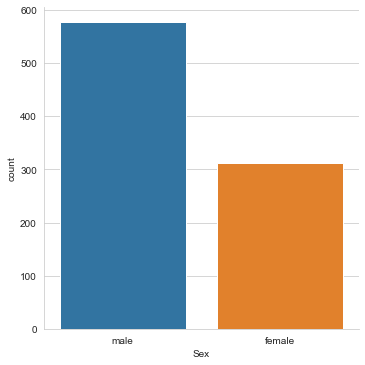

In [24]:
###Who were the passengers on the titanic? (What age, gender, class etc)

###Gender Plot
sns.factorplot('Sex',data=df,kind='count')

### Shows more male passengers than female

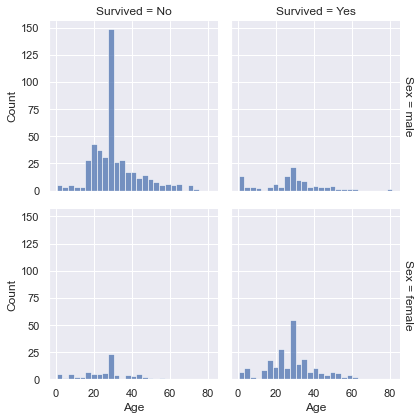

In [25]:

  ###Who were the passengers on the titanic? (What age, gender, class etc)
sns.set_theme(style="darkgrid")

sns.displot(
    df, x="Age", col="Survived", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)  
### Shows female male passengers than male a ccording to Age 

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


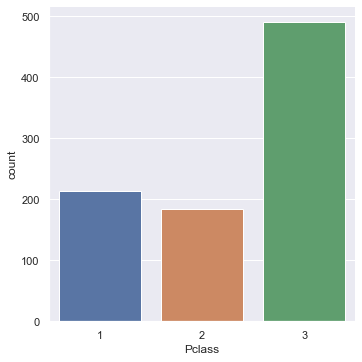

In [26]:
### Class plot
sns.factorplot('Pclass',data=df,kind='count')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


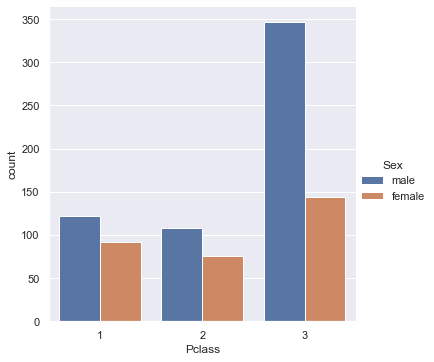

In [27]:
###Interesting! More passengers are from class Three. Now lets find the gender ration among the classes

sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

In [28]:
##This gives us an insight that there are quite a few males than females in 3rd class. Now lets dig deeper and find the children among the passengers.

def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)

In [29]:
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,male
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,male
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,male
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,female
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,male
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,7.9250,S,male
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,14.5000,S,male
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,15.7417,C,child
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,7.2500,S,male
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,26.0000,S,female


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


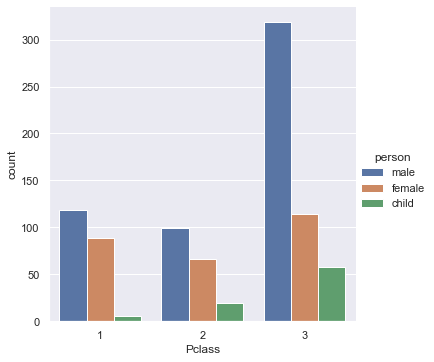

In [30]:
### Plotting a graph to check the ratio of male,female and children in each category of class

sns.factorplot('Pclass',data=df,hue='person',kind='count')

<AxesSubplot:>

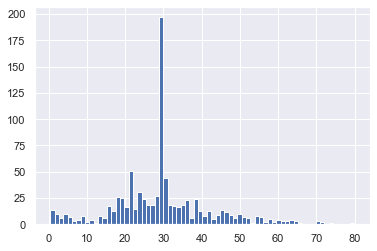

In [31]:
###Now let us look at the ages of the passengers

df['Age'].hist(bins=70)

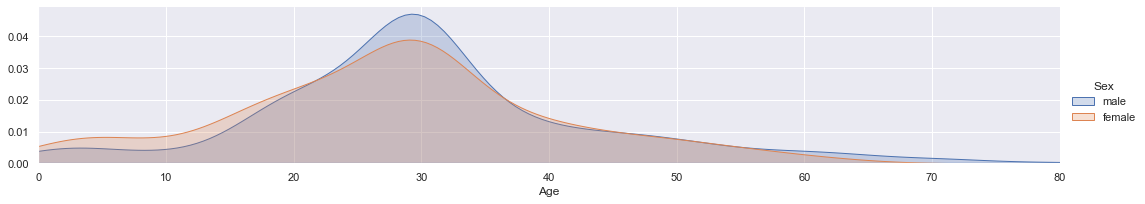

In [32]:
as_fig = sns.FacetGrid(df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

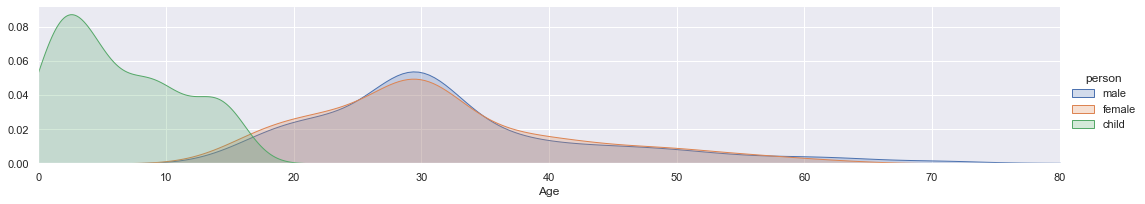

In [33]:
as_fig = sns.FacetGrid(df,hue='person',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


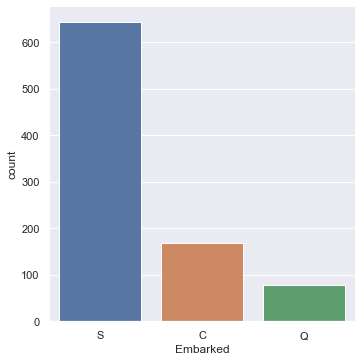

In [34]:
sns.factorplot('Embarked',data=df,kind='count')


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


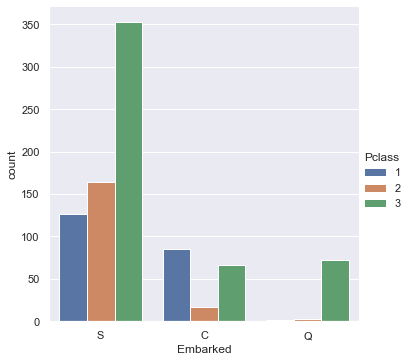

In [35]:
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')



In [36]:
## Let's check who are with family and who are alone
## This can be found by adding Parch and Sibsp columns
df['Alone'] = df.Parch + df.SibSp

In [37]:
## if Alone value is >0 then they are with family else they are Alone

df['Alone'].loc[df['Alone']>0] = 'Yes'
df['Alone'].loc[df['Alone'] == 0] = 'No'

C:\Users\HanaA\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


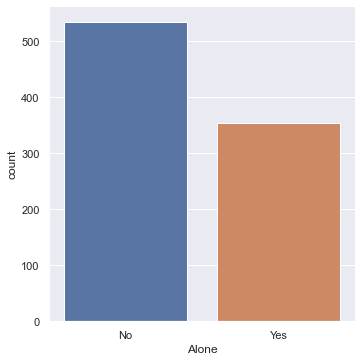

In [38]:
#Let us visualise the Alone column

sns.factorplot('Alone',kind='count',data=df)

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


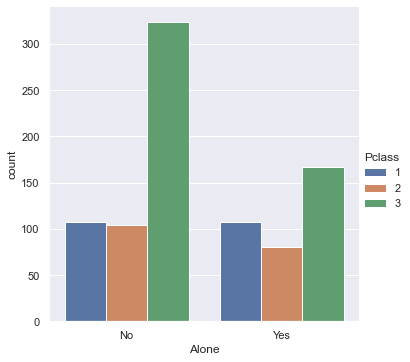

In [39]:
# let us see who are alone according to class
sns.factorplot('Alone',kind='count',data=df,hue='Pclass')

In [40]:
df["Survived"].value_counts()

No     549
Yes    340
Name: Survived, dtype: int64

In [41]:
cleanup_Survived = {"Survived":     {"No": 0, "Yes": 1}}

In [42]:
df = df.replace(cleanup_Survived)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person,Alone
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,male,No
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,male,No
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,male,No
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,female,Yes
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,male,Yes


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


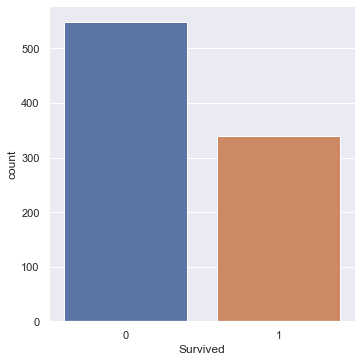

In [43]:
sns.factorplot('Survived',data=df,kind='count')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


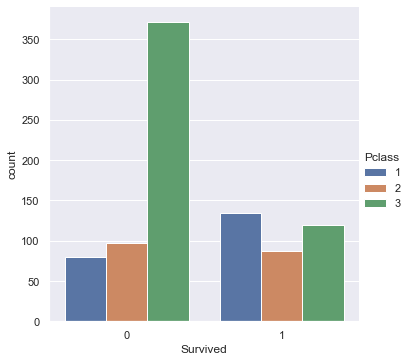

In [44]:
## checking of the class had any effect in the survival rate
sns.factorplot('Survived',data=df,kind='count',hue='Pclass')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


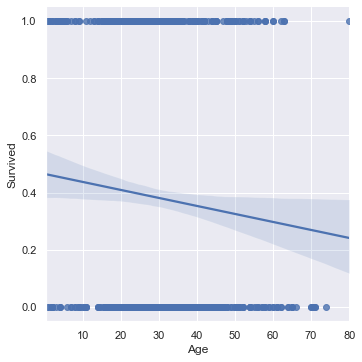

In [45]:
# Let us check how Age playes a role in the survival rate.
sns.lmplot('Age','Survived',data=df)


In [46]:
df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [47]:
cleanup_Sex = {"Sex":     {"female": 0, "male": 1}}

In [48]:
df = df.replace(cleanup_Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person,Alone
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S,male,No
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S,male,No
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S,male,No
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S,female,Yes
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S,male,Yes


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


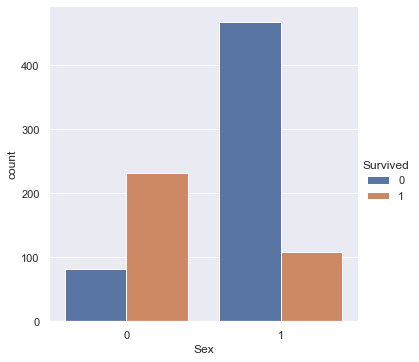

In [49]:
sns.factorplot('Sex',data=df,kind='count',hue='Survived')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


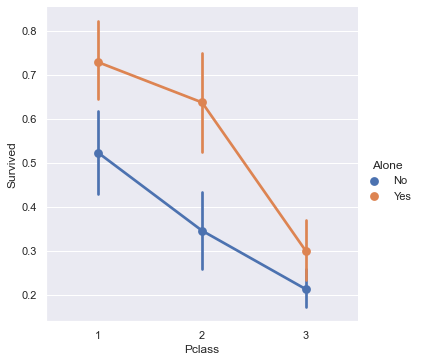

In [50]:
sns.factorplot('Pclass','Survived',data=df,hue='Alone')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


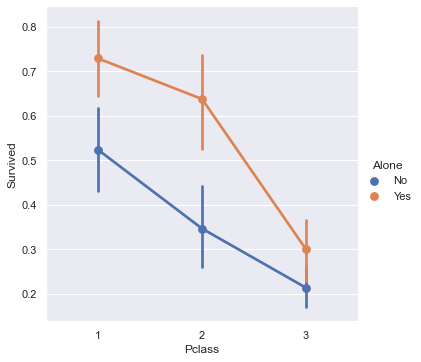

In [51]:
sns.factorplot('Pclass','Survived',data=df,hue='Alone')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  person       889 non-null    object 
 11  Alone        889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 122.6+ KB


In [53]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
cleanup_Embarked = {"Embarked":     {"S": 1, "C": 2, "Q":3}}

In [55]:
df = df.replace(cleanup_Embarked)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person,Alone
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,1,male,No
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,1,male,No
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,1,male,No
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,1,female,Yes
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,1,male,Yes


In [56]:
# correlation with target
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


In [57]:
df['Title'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0])
df['Title'].value_counts()

 Mr              517
 Miss            181
 Mrs             124
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Mme               1
 Don               1
 Capt              1
 Ms                1
 the Countess      1
 Lady              1
 Jonkheer          1
 Sir               1
Name: Title, dtype: int64

In [58]:
df.groupby('Title').mean()[['Age', 'Fare', 'Survived']]



,Age,Fare,Survived
Title,,,
Capt,70.000000,71.000000,0.000000
Col,58.000000,31.025000,0.500000
Don,40.000000,27.720800,0.000000
Dr,40.242731,49.168457,0.428571
Jonkheer,38.000000,0.000000,0.000000
Lady,48.000000,39.600000,1.000000
Major,48.500000,28.525000,0.500000
Master,7.086662,34.703125,0.575000
Miss,23.260598,43.597861,0.696133


In [59]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.740385
1,1,0.188908


In [60]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.343234
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [61]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


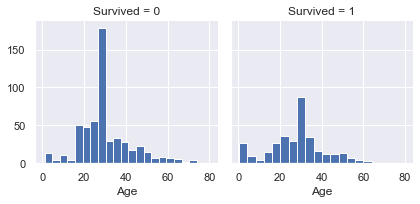

In [62]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


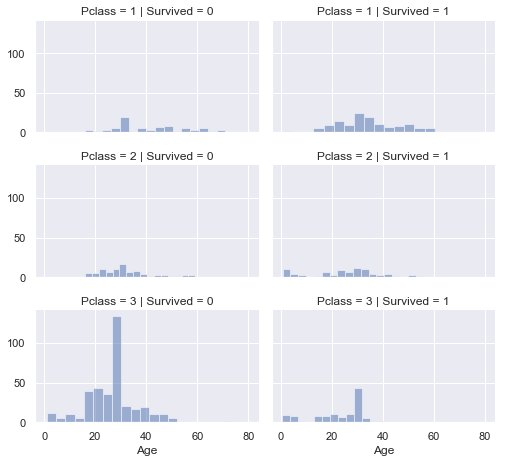

In [63]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


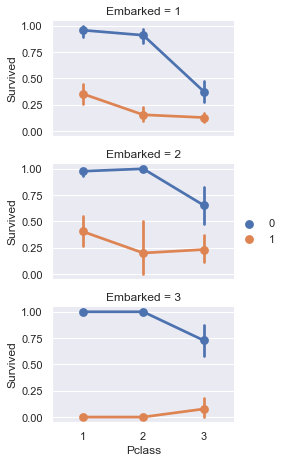

In [64]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


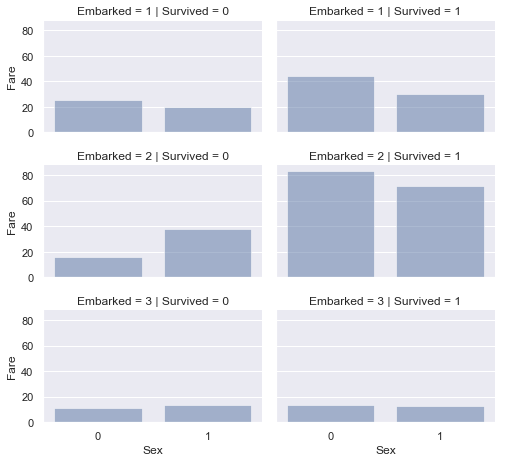

In [65]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [66]:
for dataset in df:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


PassengerId   -0.005028
Survived       1.000000
Pclass        -0.335549
Sex           -0.541585
Age           -0.074673
SibSp         -0.034040
Parch          0.083151
Fare           0.255290
Embarked       0.108669
Name: Survived, dtype: float64


<ipython-input-67-66f400ab96a1>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


AttributeError: module 'seaborn' has no attribute 'plt'

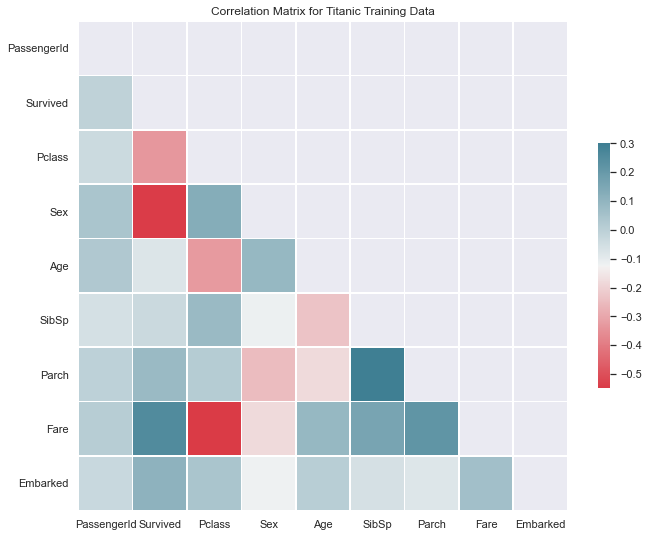

In [67]:
# View correlation matrix with survival
corr = df.corr()
print(corr['Survived'])

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation Matrix for Titanic Training Data')
sns.plt.show()

In [ ]:
df.groupby("Title")["Age"].mean()


In [68]:
df.groupby('Title').size()


Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        181
Mlle          2
Mme           1
Mr          517
Mrs         124
Ms            1
Rev           6
Sir           1
dtype: int64

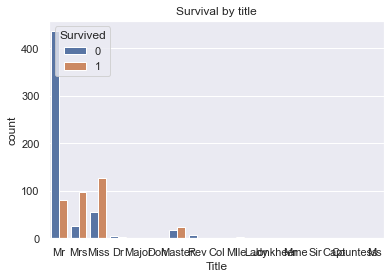

In [69]:
countplot_title = sns.countplot(x = 'Title', hue = 'Survived', data = df).set_title('Survival by title')
plt.show()

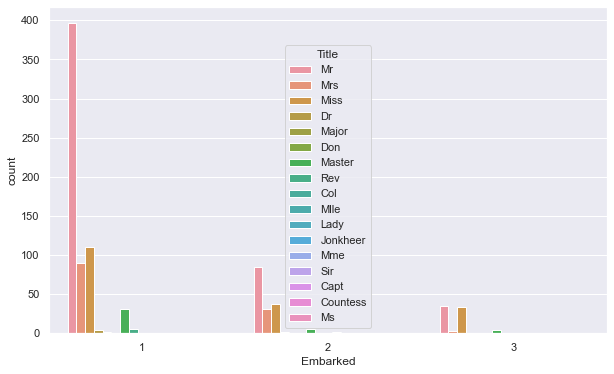

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Embarked", hue="Title", data=df)
plt.show()

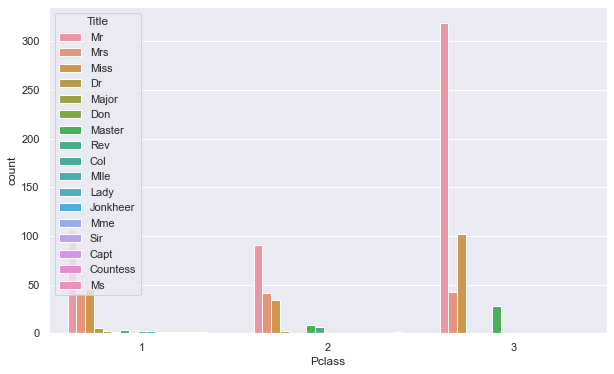

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", hue="Title", data=df)
plt.show()

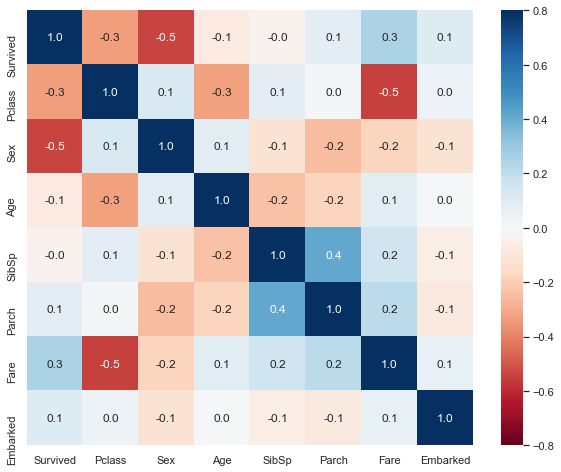

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('PassengerId', axis=1).corr(), annot=True, fmt='.1f', cmap='RdBu', vmax=0.8, vmin=-0.8)
plt.show()

<AxesSubplot:title={'center':'Survived by family size (%)'}, xlabel='FamilySize'>

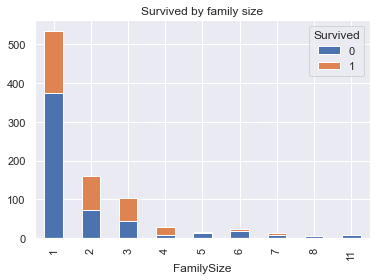

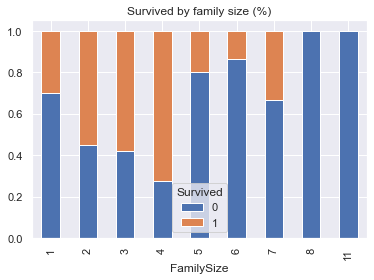

In [73]:
for dataset in df:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
pd.crosstab(df['FamilySize'], df['Survived']).plot(kind='bar', stacked=True, title="Survived by family size")
pd.crosstab(df['FamilySize'], df['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)")